# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

np.random.seed(42)


training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
## Split train and valid dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

<Container object of 43 artists>

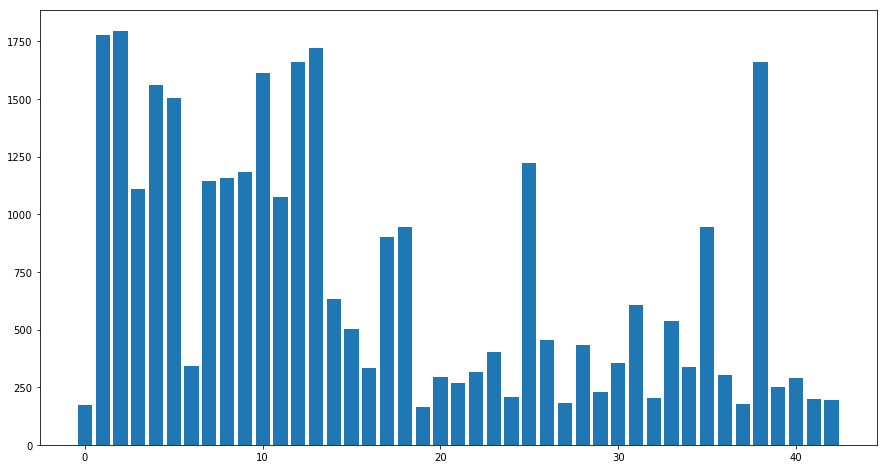

In [5]:
### Histogram of test and validation y classes

class_count_lst = []
for i in range(43):
    examples_in_class = y_train[y_train == i].shape[0]
    class_count_lst.append(examples_in_class)

plt.figure(figsize=(15, 8))
plt.bar(range(43), class_count_lst)

### Example image of all traffic signs 

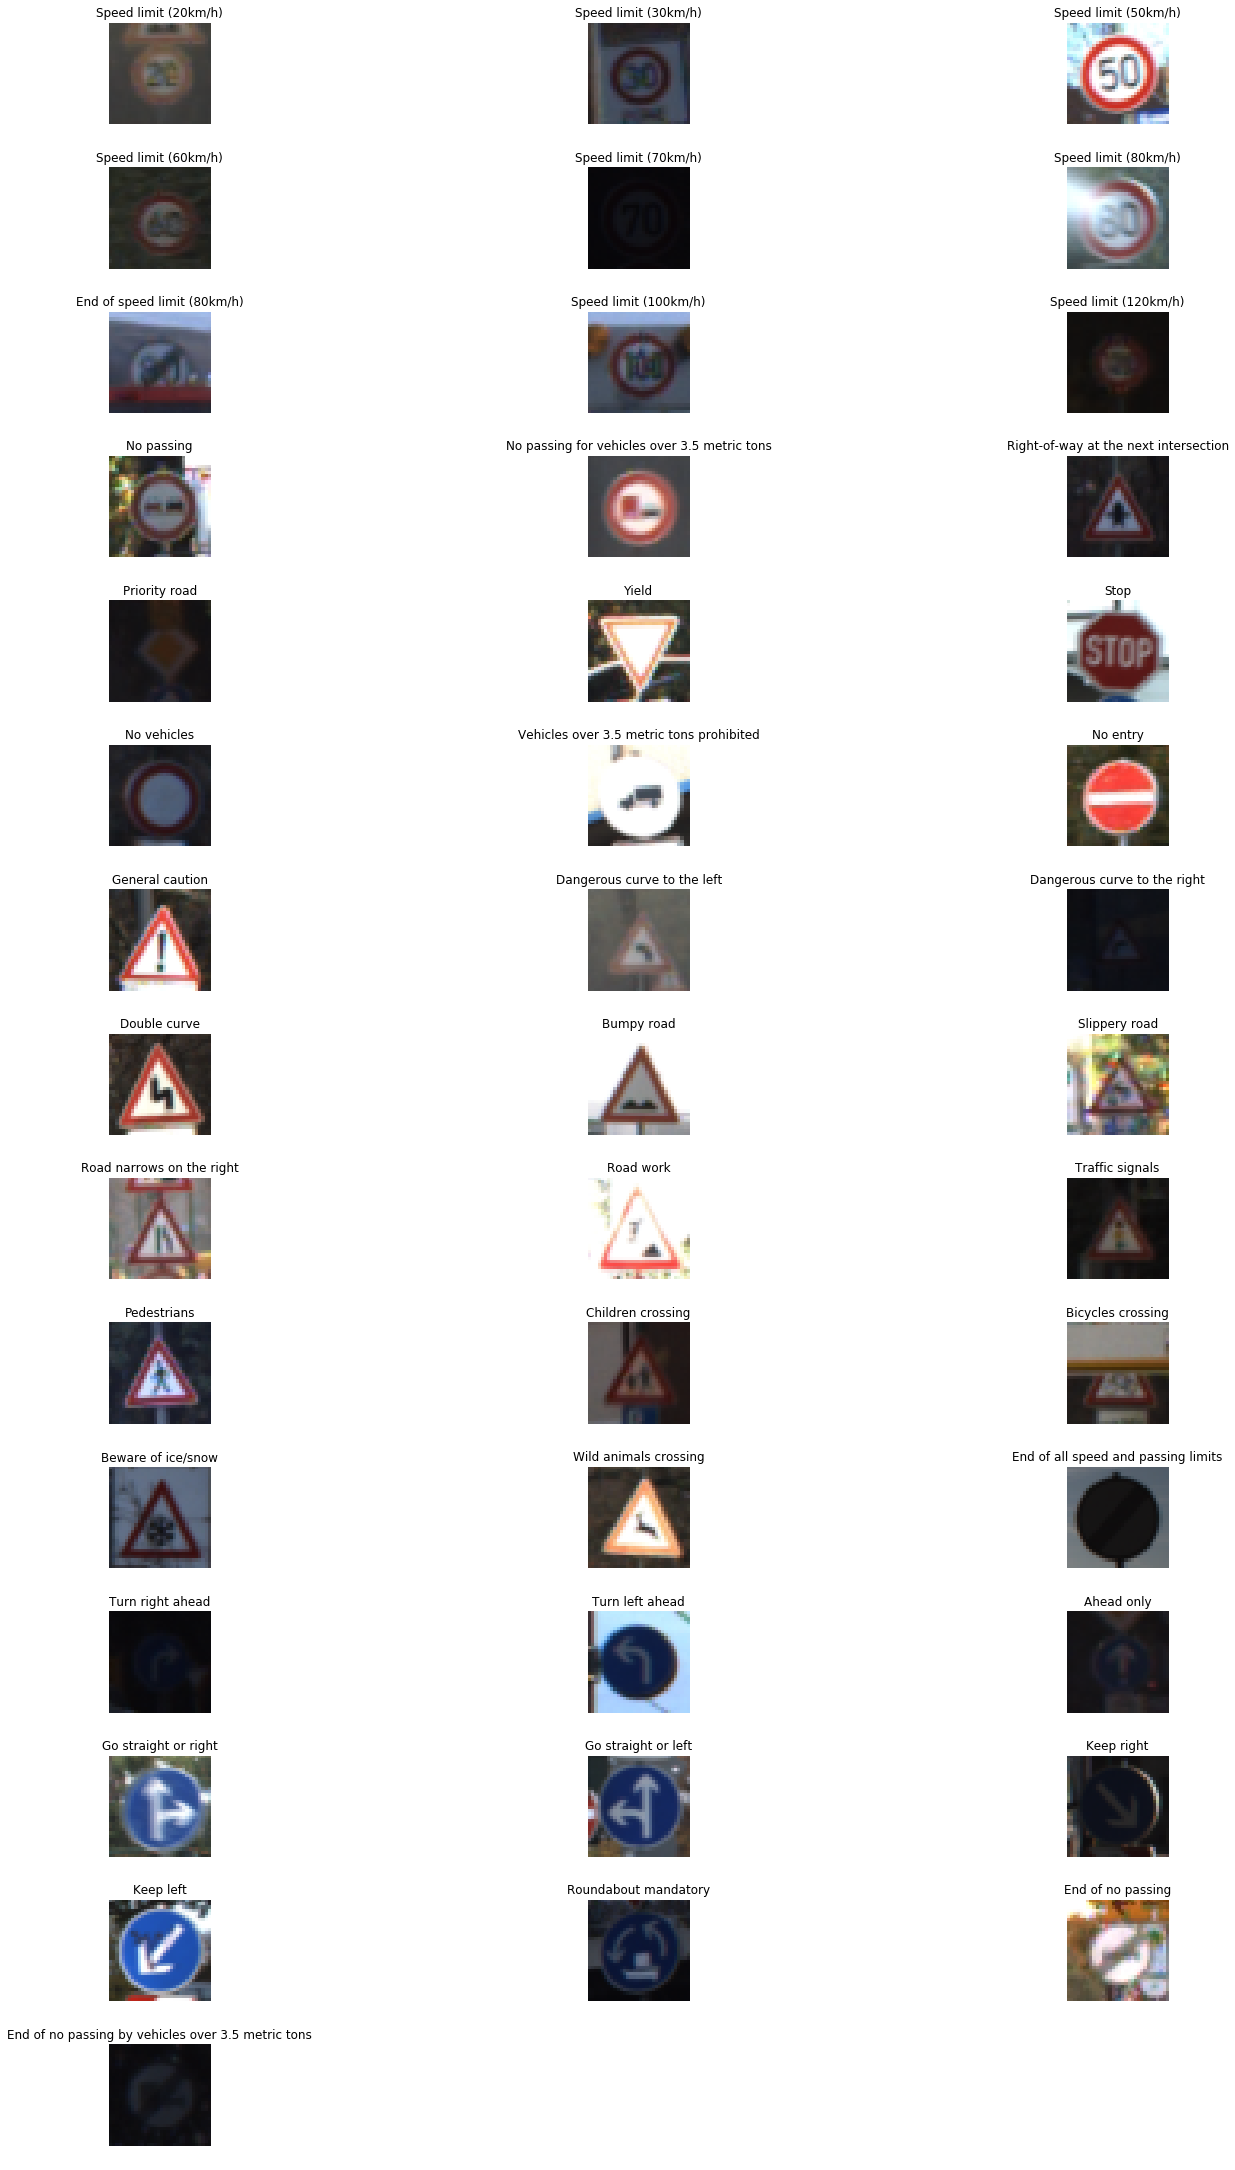

In [6]:
label_indx_map = {}

for idx, label in enumerate(y_train):
    if label not in label_indx_map:
        label_indx_map[label] = idx
        
### Printing example of each kind
import pandas as pd

signs = pd.read_csv("signnames.csv")
def get_sign_name(class_id):
    return signs[signs['ClassId'] == class_id]['SignName'].tolist()[0]

plt.figure(figsize=(20,30))
for idx, key in enumerate(label_indx_map):
    sign_name = get_sign_name(key)
    plt.subplot(15, 3, idx+1)
    plt.imshow(X_train[label_indx_map[key]])
    plt.title(sign_name)
    plt.axis('off')
plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=1.0)



----

## Step 2: Design and Test a Model Architecture

Using LeNet architecture for traffic sign classification.

### Pre-process the Data Set (normalization, grayscale, etc.)

For pre processing, I converting images to grayscale and then normalizing the pixel values.

In [7]:

def convert_to_gray(X):
    wt_arr = [0.299, 0.587, 0.114]
    X = np.einsum("ijkl,l -> ijk", X, wt_arr)
    X = X[:, :, :, np.newaxis]
    return X

def normalize(X):
    X = X.astype(int)
    X = (X-128)/128
    return X

def preprocess(X):
    X = convert_to_gray(X)
    X = normalize(X)
    return X

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

### Model Architecture

In [9]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [10]:
import tensorflow as tf

tf.set_random_seed(42)

EPOCHS = 15
BATCH_SIZE = 128

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal([5,5,1,6], mu, sigma))
    b1 = tf.Variable(tf.random_normal([6]))
    layer1 = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='VALID')
    layer1 = tf.nn.bias_add(layer1, b1)
    print("First conv: ", layer1)

    # TODO: Activation.
    layer1 = tf.nn.relu(layer1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal([5,5,6,16], mu, sigma))
    b2 = tf.Variable(tf.random_normal([16]))
    layer2 = tf.nn.conv2d(layer1, W2, strides=[1,1,1,1], padding='VALID')
    layer2 = tf.nn.bias_add(layer2, b2)
    print("Second conv: ", layer2)

    
    # TODO: Activation.
    layer2 = tf.nn.relu(layer2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print(layer2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flatten_layer = flatten(layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal([400,120], mu, sigma))
    b3 = tf.Variable(tf.random_normal([120], mu, sigma))
    layer3 = tf.add(tf.matmul(flatten_layer, W3), b3)
    
    # TODO: Activation.
    layer3 = tf.nn.relu(layer3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))
    b4 = tf.Variable(tf.random_normal([84], mu, sigma))
    layer4 = tf.add(tf.matmul(layer3, W4), b4)
    
    # TODO: Activation.
    layer4 = tf.nn.relu(layer4)


    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal([84, 43], mu, sigma))
    b5 = tf.Variable(tf.random_normal([43], mu, sigma))
    logits = tf.add(tf.matmul(layer4, W5), b5)
    
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

First conv:  Tensor("BiasAdd:0", shape=(?, 28, 28, 6), dtype=float32)
Second conv:  Tensor("BiasAdd_1:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)


In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
traffic_sign_trained_model = 'train_model.ckpt'
saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    # Save the model
    saver.save(sess, traffic_sign_trained_model)
    print('Trained model saved to file ', traffic_sign_trained_model)

Training...

EPOCH 1 ...
Validation Accuracy = 0.489
EPOCH 2 ...
Validation Accuracy = 0.771
EPOCH 3 ...
Validation Accuracy = 0.851
EPOCH 4 ...
Validation Accuracy = 0.898
EPOCH 5 ...
Validation Accuracy = 0.906
EPOCH 6 ...
Validation Accuracy = 0.931
EPOCH 7 ...
Validation Accuracy = 0.936
EPOCH 8 ...
Validation Accuracy = 0.935
EPOCH 9 ...
Validation Accuracy = 0.953
EPOCH 10 ...
Validation Accuracy = 0.950
EPOCH 11 ...
Validation Accuracy = 0.935
EPOCH 12 ...
Validation Accuracy = 0.960
EPOCH 13 ...
Validation Accuracy = 0.958
EPOCH 14 ...
Validation Accuracy = 0.965
EPOCH 15 ...
Validation Accuracy = 0.966
Trained model saved to file  train_model.ckpt


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [17]:
with tf.Session() as sess:
    saver.restore(sess, traffic_sign_trained_model)

    train_accuracy = sess.run(accuracy_operation, feed_dict={x: X_train, y: y_train})

    print('Train Accuracy: {}'.format(train_accuracy))

INFO:tensorflow:Restoring parameters from train_model.ckpt
Train Accuracy: 0.9822417497634888


In [18]:
with tf.Session() as sess:
    saver.restore(sess, traffic_sign_trained_model)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test})

    print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from train_model.ckpt
Test Accuracy: 0.8680922985076904


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
downloaded_data = pickle.load(open("data/downloaded_test.p", "rb"))
downloaded_features = downloaded_data['features']
downloaded_labels = downloaded_data['labels']

### Print downloaded images

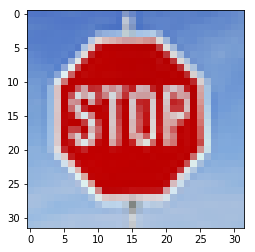

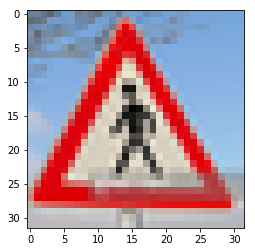

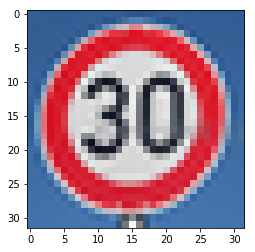

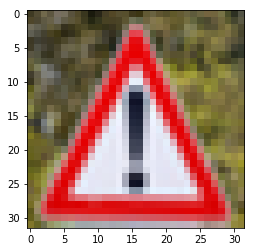

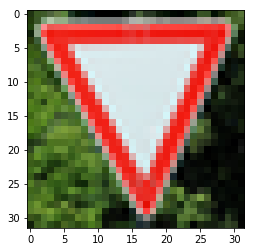

In [20]:
for feature in downloaded_features:
    plt.figure()
    plt.imshow(feature)

### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

processed_features = preprocess(downloaded_features)
logit_outputs = None

with tf.Session() as sess:
    saver.restore(sess, traffic_sign_trained_model)

    #test_accuracy = sess.run(accuracy_operation, feed_dict={x: processed_features, y: downloaded_labels})
    #(tf.argmax(logits, 1)
    (logit_outputs, downloaded_accuracy) = sess.run((logits,accuracy_operation) , 
                                                    feed_dict={x: processed_features, y: downloaded_labels})
    #print(logit_outputs)
    for logit_output in sess.run(tf.argmax(logit_outputs, 1)):
        print("Sign name: ", get_sign_name(logit_output))

    #print('Downloaded Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from train_model.ckpt
Sign name:  Stop
Sign name:  General caution
Sign name:  Speed limit (30km/h)
Sign name:  General caution
Sign name:  Yield


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Downloaded signs accuracy: ", downloaded_accuracy)

Downloaded signs accuracy:  0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
logit_outputs.shape
for logit_output in logit_outputs:
    logit_output = np.exp(logit_output)
    logit_output /= np.sum(logit_output)
    print("Top 5 softmax probabilities: ", sorted(logit_output, reverse=True)[:5])
    print("Top 5 class labels: ", np.argsort(-logit_output)[:5])

Top 5 softmax probabilities:  [0.99999994, 5.2332915e-08, 2.1297833e-08, 1.2949982e-08, 3.2493966e-10]
Top 5 class labels:  [14 17 38 33 12]
Top 5 softmax probabilities:  [0.91073626, 0.08926335, 3.3878004e-07, 2.5473916e-08, 2.4780041e-08]
Top 5 class labels:  [18 27 11 24 40]
Top 5 softmax probabilities:  [0.99939442, 0.0005454112, 5.8998747e-05, 1.1311614e-06, 2.4012618e-08]
Top 5 class labels:  [1 2 5 0 4]
Top 5 softmax probabilities:  [0.99999815, 1.8046164e-06, 2.9746752e-09, 8.2764094e-11, 4.110191e-11]
Top 5 class labels:  [18 27 26 11 40]
Top 5 softmax probabilities:  [0.99618953, 0.0038103028, 1.7572069e-07, 7.3871111e-11, 2.3119874e-12]
Top 5 class labels:  [13  9 35  3 10]


### Project Writeup

Project write [writeup](https://github.com/sausax/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup.md) 